In [2]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

## Spam Email Classification
Download the dataset on spam vs. non-spam emails from the following URL:
http://archive.ics.uci.edu/ml/datasets/Spambase. 

Specifically, (i) file “spambase.data” contains the actual data,
and (ii) files “spambase.names” and “spambase.DOCUMENTATION” contain the description of the data.
This dataset has 4601 records, each record representing a different email message. Each record is described
with 58 attributes (indicated in the aforementioned .names file): attributes 1-57 represent various content-
based characteristics already extracted from each email message (related to the frequency of certain words
or certain punctuation symbols in a message as well as to the usage of capital letters in a message), and the
last attribute represents the class label for each message (spam or non-spam).

Task: The general task for this assignment is to build two different models for detecting spam messages (based
on the email characteristics that are given): (i) the best possible model that you can build in terms of the
overall predictive accuracy (i.e., not taking any cost information into account), and (ii) the best cost-sensitive
classification model that you can build in terms of the average misclassification cost.

In [3]:
spam= pd.read_csv('spambase.data',header=None)

In [4]:
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
spam.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',
'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business',
'word_freq_email','word_freq_you','word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'Spam']

#### Explore Data

In [6]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
spam.shape

(4601, 58)

###### deal with outliers

In [9]:
outcol = ['capital_run_length_average','capital_run_length_longest','capital_run_length_total','char_freq_!']
for i in outcol:
    Q1,Q3 = np.percentile(spam[i] , [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = spam.capital_run_length_average[(spam[i] > ul) | (spam[i] < ll)]
    spam = spam.drop(outliers.index)

In [10]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,...,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,0.085605,0.244635,0.228334,0.001323,0.268598,0.073797,0.077479,0.081142,0.030749,0.184124,...,0.030077,0.145139,0.019023,0.070170,0.042308,0.023944,2.178661,14.033982,82.683603,0.234906
std,0.316207,1.570708,0.500496,0.028980,0.697686,0.270038,0.343399,0.409083,0.197918,0.570164,...,0.195937,0.246215,0.129097,0.127566,0.194459,0.254523,1.099472,14.064767,77.324889,0.424010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.406500,4.000000,23.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.048000,0.000000,0.000000,0.000000,0.000000,1.870000,11.000000,59.000000,0.000000
75%,0.000000,0.000000,0.280000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.204000,0.000000,0.094000,0.000000,0.000000,2.594000,17.000000,119.000000,0.000000
max,4.340000,14.280000,5.100000,0.870000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,4.187000,5.277000,4.081000,0.515000,6.003000,7.407000,6.800000,70.000000,354.000000,1.000000


#### Feature Selection

In [11]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X = spam.iloc[:,:-1]
y = spam.Spam
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X = model.transform(X)

/Users/yuxuanyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [12]:
X.shape

(3031, 25)

#### Normalization

In [13]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Decision Tree

In [15]:
# Set Hyper-parameter

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
inner_cv = KFold(n_splits=4,shuffle=True,random_state=1)
outer_cv = KFold(n_splits=4,shuffle=True,random_state=1)

tuned_parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

dt = tree.DecisionTreeClassifier()
dt = GridSearchCV(dt,tuned_parameters,cv=inner_cv,scoring='accuracy')

dt.fit(X_train,y_train)

dt_best_params = dt.best_params_
dt_best_scores = dt.best_score_
dt_best_params, dt_best_scores

({'criterion': 'entropy', 'max_depth': 30}, 0.9137905931137306)

[Text(0.7929871815036175, 0.9782608695652174, 'X[21] <= -0.153\nentropy = 0.789\nsamples = 2030\nvalue = [1550, 480]'),
 Text(0.6564367725699906, 0.9347826086956522, 'X[2] <= -0.036\nentropy = 0.577\nsamples = 1711\nvalue = [1476, 235]'),
 Text(0.5141947153192828, 0.8913043478260869, 'X[5] <= 0.162\nentropy = 0.444\nsamples = 1614\nvalue = [1465, 149]'),
 Text(0.38573450770682605, 0.8478260869565217, 'X[13] <= -0.321\nentropy = 0.338\nsamples = 1483\nvalue = [1390, 93]'),
 Text(0.37566844919786097, 0.8043478260869565, 'X[6] <= -0.036\nentropy = 0.439\nsamples = 1025\nvalue = [932, 93]'),
 Text(0.28483799937087134, 0.7608695652173914, 'X[23] <= -0.251\nentropy = 0.375\nsamples = 993\nvalue = [921, 72]'),
 Text(0.1635734507706826, 0.717391304347826, 'X[8] <= -0.234\nentropy = 0.209\nsamples = 729\nvalue = [705, 24]'),
 Text(0.120792702107581, 0.6739130434782609, 'X[9] <= 23.944\nentropy = 0.077\nsamples = 424\nvalue = [420, 4]'),
 Text(0.11072664359861592, 0.6304347826086957, 'X[11] <= 0

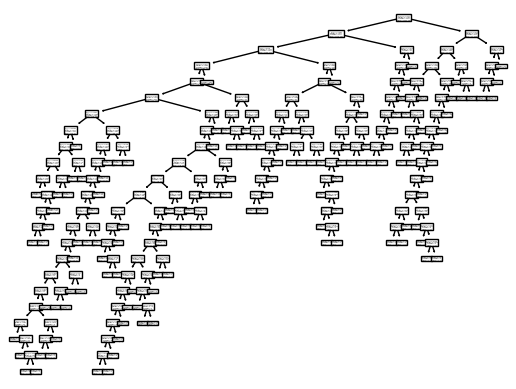

In [17]:
dt_best = tree.DecisionTreeClassifier(**dt_best_params)
dt_best = dt_best.fit(X_train, y_train)
tree.plot_tree(dt_best)

In [18]:
accuracy = cross_val_score(dt_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(dt_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(dt_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(dt_best,X_train,y_train,cv=10,scoring='f1')


print(accuracy)
print(precision)
print(recall)
print(f1_score)

[0.90147783 0.87684729 0.90640394 0.93596059 0.91133005 0.89655172
 0.89162562 0.90147783 0.90147783 0.93596059]
[0.84210526 0.68       0.82222222 0.86956522 0.80769231 0.81395349
 0.76595745 0.84782609 0.82       0.91111111]
[0.66666667 0.70833333 0.77083333 0.83333333 0.89583333 0.72916667
 0.75       0.75       0.85416667 0.83333333]
[0.77272727 0.75268817 0.80434783 0.84782609 0.85714286 0.77419355
 0.77083333 0.85106383 0.79207921 0.89361702]


In [19]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

Accuracy: 0.91 (+/- 0.03)
Precision: 0.82 (+/- 0.12)
Recall: 0.78 (+/- 0.14)
F1_score: 0.81 (+/- 0.09)


#### Logistic Regression

In [20]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

tuned_parameters = dict(solver=solvers,penalty=penalty,C=c_values)

lr = linear_model.LogisticRegression()
lr = GridSearchCV(lr,tuned_parameters,cv=inner_cv,scoring='accuracy')

lr.fit(X_train,y_train)

lr_best_params = lr.best_params_
lr_best_scores = lr.best_score_
lr_best_params, lr_best_scores

/Users/yuxuanyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yuxuanyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

({'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}, 0.9162512230349905)

In [21]:
lr_best = linear_model.LogisticRegression(**lr_best_params)
lr_best = lr_best.fit(X_train, y_train)

In [22]:
accuracy = cross_val_score(lr_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(lr_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(lr_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(lr_best,X_train,y_train,cv=10,scoring='f1')


print(accuracy)
print(precision)
print(recall)
print(f1_score)

[0.91625616 0.91133005 0.91133005 0.90640394 0.93596059 0.92610837
 0.88669951 0.92610837 0.92118227 0.92118227]
[0.8974359  0.89473684 0.84090909 0.80851064 0.90697674 0.83673469
 0.82051282 0.86666667 0.9        0.86363636]
[0.72916667 0.70833333 0.77083333 0.79166667 0.8125     0.85416667
 0.66666667 0.8125     0.75       0.79166667]
[0.8045977  0.79069767 0.80434783 0.8        0.85714286 0.84536082
 0.73563218 0.83870968 0.81818182 0.82608696]


In [23]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

Accuracy: 0.92 (+/- 0.03)
Precision: 0.86 (+/- 0.07)
Recall: 0.77 (+/- 0.11)
F1_score: 0.81 (+/- 0.07)


#### KNN

In [24]:
tuned_parameters =  {'weights':['uniform','distance'],'n_neighbors':list(range(5,50)),'leaf_size': [1,20,30,40],
'p' : [1,2],'metric' : ['minkowski', 'chebyshev']}

knn = neighbors.KNeighborsClassifier()
knn = GridSearchCV(knn,tuned_parameters,cv=inner_cv,scoring='accuracy')

knn.fit(X_train,y_train)

knn_best_params = knn.best_params_
knn_best_scores = knn.best_score_
knn_best_params, knn_best_scores

({'leaf_size': 1,
  'metric': 'minkowski',
  'n_neighbors': 12,
  'p': 2,
  'weights': 'distance'},
 0.9182304042615974)

In [25]:
knn_best = neighbors.KNeighborsClassifier(**knn_best_params)
knn_best = knn_best.fit(X_train, y_train)

In [26]:
accuracy = cross_val_score(knn_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(knn_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(knn_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(knn_best,X_train,y_train,cv=10,scoring='f1')


print(accuracy)
print(precision)
print(recall)
print(f1_score)

[0.91133005 0.91625616 0.92118227 0.9408867  0.91133005 0.91133005
 0.90147783 0.93596059 0.9408867  0.93103448]
[0.96875    0.87804878 0.92105263 0.92857143 0.82608696 0.89473684
 0.96666667 0.92682927 0.97368421 0.97222222]
[0.64583333 0.75       0.72916667 0.8125     0.79166667 0.70833333
 0.60416667 0.79166667 0.77083333 0.72916667]
[0.775      0.80898876 0.81395349 0.86666667 0.80851064 0.79069767
 0.74358974 0.85393258 0.86046512 0.83333333]


In [27]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

Accuracy: 0.92 (+/- 0.03)
Precision: 0.93 (+/- 0.09)
Recall: 0.73 (+/- 0.13)
F1_score: 0.82 (+/- 0.07)


#### SVM

In [45]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

svc = SVC()

svc = GridSearchCV(svc,tuned_parameters,cv=inner_cv,scoring='accuracy')

svc.fit(X_train,y_train)

svc_best_params = svc.best_params_
svc_best_scores = svc.best_score_
svc_best_params, svc_best_scores

({'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9270857599900604)

In [52]:
svc_best = SVC(**svc_best_params,probability=True)
svc_best = svc_best.fit(X_train, y_train)

In [53]:
accuracy = cross_val_score(svc_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(svc_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(svc_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(svc_best,X_train,y_train,cv=10,scoring='f1')


print(accuracy)
print(precision)
print(recall)
print(f1_score)

[0.9408867  0.94581281 0.94581281 0.92610837 0.93103448 0.93596059
 0.93103448 0.93103448 0.90640394 0.92610837]
[0.92682927 0.90909091 0.92857143 0.94444444 0.90243902 0.84313725
 0.925      0.86956522 0.89189189 0.86666667]
[0.80851064 0.85106383 0.82978723 0.72340426 0.78723404 0.89583333
 0.77083333 0.83333333 0.6875     0.8125    ]
[0.86363636 0.87912088 0.87640449 0.81927711 0.84090909 0.86868687
 0.84090909 0.85106383 0.77647059 0.83870968]


In [54]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

Accuracy: 0.93 (+/- 0.02)
Precision: 0.90 (+/- 0.06)
Recall: 0.80 (+/- 0.12)
F1_score: 0.85 (+/- 0.06)


#### Gradient Boosting

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

tuned_parameters = [{'n_estimators':[50,100],'max_depth':[3,5,7],
                    'min_samples_split':[3,5,7],'min_samples_leaf':[3,5,7],
                     'max_features':['sqrt','log2'],'learning_rate':[0.1,0.5,0.05,0.01,0.005],'subsample':[0.5,0.7]}]

gb = GradientBoostingClassifier()

gb = GridSearchCV(gb,tuned_parameters,cv=inner_cv,scoring='accuracy')

gb.fit(X_train,y_train)

gb_best_params = gb.best_params_
gb_best_scores = gb.best_score_
gb_best_params, gb_best_scores

({'learning_rate': 0.1,
  'max_depth': 7,
  'max_features': 'log2',
  'min_samples_leaf': 7,
  'min_samples_split': 7,
  'n_estimators': 100,
  'subsample': 0.5},
 0.9443247293792418)

In [168]:
gb_best = GradientBoostingClassifier(**gb_best_params)
gb_best = gb_best.fit(X_train, y_train)

In [169]:
accuracy = cross_val_score(gb_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(gb_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(gb_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(gb_best,X_train,y_train,cv=10,scoring='f1')


print(accuracy)
print(precision)
print(recall)
print(f1_score)

[0.95073892 0.95073892 0.9408867  0.92610837 0.93596059 0.95073892
 0.92118227 0.92118227 0.94581281 0.96551724]
[0.93478261 0.90909091 0.90909091 0.87804878 0.88372093 0.89361702
 0.86363636 0.86363636 0.88636364 0.91304348]
[0.91489362 0.82978723 0.85106383 0.76595745 0.82978723 0.89583333
 0.77083333 0.8125     0.8125     0.89583333]
[0.92307692 0.85714286 0.89130435 0.8372093  0.86666667 0.85714286
 0.85714286 0.82608696 0.83870968 0.91489362]


In [170]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

Accuracy: 0.94 (+/- 0.03)
Precision: 0.89 (+/- 0.04)
Recall: 0.84 (+/- 0.10)
F1_score: 0.87 (+/- 0.06)


#### Random Forest

In [ ]:
##Random Forest
tuned_parameters = [{'n_estimators':[100,200,300],'max_depth':[2,3,4],
                    'min_samples_split':[2,3,5],'min_samples_leaf':[2,3,5],'max_features':['sqrt','log2']}]

rf = RandomForestClassifier(n_jobs=-1)
clf_rf = GridSearchCV(rf,tuned_parameters,cv=inner_cv,scoring='accuracy')

clf_rf.fit(X_train,y_train)

rf_best_params = clf_rf.best_params_
rf_best_scores = clf_rf.best_score_

rf_best = RandomForestClassifier(**rf_best_params)
rf_best = rf_best.fit(X_train, y_train)

rf_pred = rf_best.predict(X_test)
rf_result = accuracy_score(y_test, rf_pred)




In [65]:
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = [{'n_estimators':[100,200,300],'max_depth':[2,3,4],
                    'min_samples_split':[2,3,5],'min_samples_leaf':[2,3,5],'max_features':['sqrt','log2']}]

rf = RandomForestClassifier(n_jobs=-1)
clf_rf = GridSearchCV(rf,tuned_parameters,cv=inner_cv,scoring='accuracy')

clf_rf.fit(X_train,y_train)

rf_best_params = clf_rf.best_params_
rf_best_scores = clf_rf.best_score_
rf_best_params, rf_best_scores

({'max_depth': 4,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.9137779744987498)

In [66]:
rf_best = RandomForestClassifier(**rf_best_params)
rf_best = rf_best.fit(X_train, y_train)

In [67]:
accuracy = cross_val_score(rf_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(rf_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(rf_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(rf_best,X_train,y_train,cv=10,scoring='f1')


print(accuracy)
print(precision)
print(recall)
print(f1_score)

[0.9408867  0.92118227 0.93103448 0.88669951 0.89655172 0.91625616
 0.90147783 0.92610837 0.88669951 0.92118227]
[0.97058824 0.94285714 0.97222222 1.         0.88235294 0.91891892
 0.91428571 0.97142857 0.85714286 0.91666667]
[0.68085106 0.70212766 0.72340426 0.4893617  0.61702128 0.70833333
 0.64583333 0.6875     0.625      0.70833333]
[0.8        0.79012346 0.81927711 0.67605634 0.725      0.8
 0.74698795 0.81927711 0.72289157 0.81927711]


In [68]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

Accuracy: 0.91 (+/- 0.04)
Precision: 0.93 (+/- 0.09)
Recall: 0.66 (+/- 0.13)
F1_score: 0.77 (+/- 0.10)


#### Model Selection

In [72]:
dt_score = cross_val_score(dt_best,X=X_train,y=y_train,cv=outer_cv)
dt_score.mean()

0.9049177654568327

In [73]:
knn_score = cross_val_score(knn_best,X=X_train,y=y_train,cv=outer_cv)
knn_score.mean()

0.9206803568932582

In [74]:
lr_score = cross_val_score(lr_best,X=X_train,y=y_train,cv=outer_cv)
lr_score.mean()

0.9118182065259594

In [75]:
svc_score = cross_val_score(svc_best,X=X_train,y=y_train,cv=outer_cv)
svc_score.mean()

0.9270857599900604

In [171]:
gb_score = cross_val_score(gb_best,X=X_train,y=y_train,cv=outer_cv)
gb_score.mean()

0.9339794064203513

In [77]:
rf_score = cross_val_score(rf_best,X=X_train,y=y_train,cv=outer_cv)
rf_score.mean()

0.9103282392955319

###### According to the result, the gradient boosting model is the best model.

In [172]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = gb_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[744  20]
 [ 42 195]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       764
           1       0.91      0.82      0.86       237

    accuracy                           0.94      1001
   macro avg       0.93      0.90      0.91      1001
weighted avg       0.94      0.94      0.94      1001



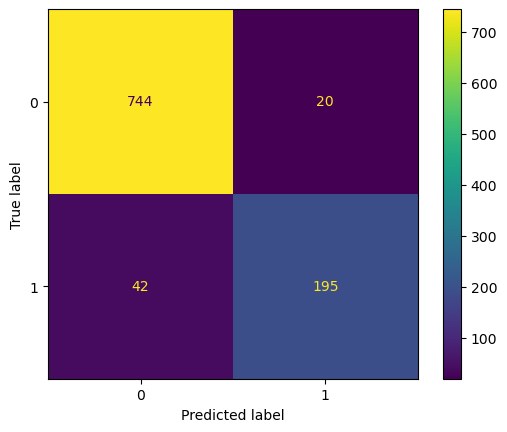

In [173]:
plot_confusion_matrix(gb_best,X_test,y_test)  
plt.show()

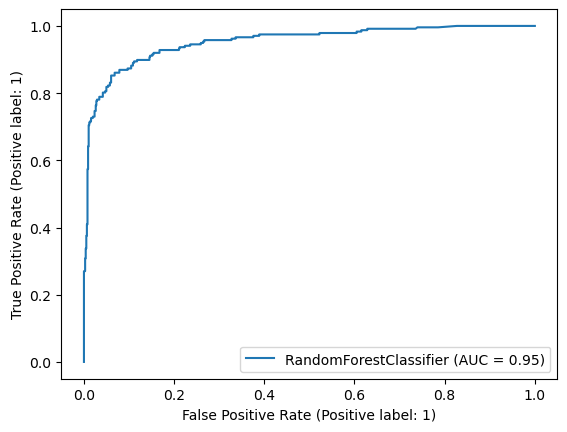

In [174]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf_best, X_test, y_test)
plt.show()

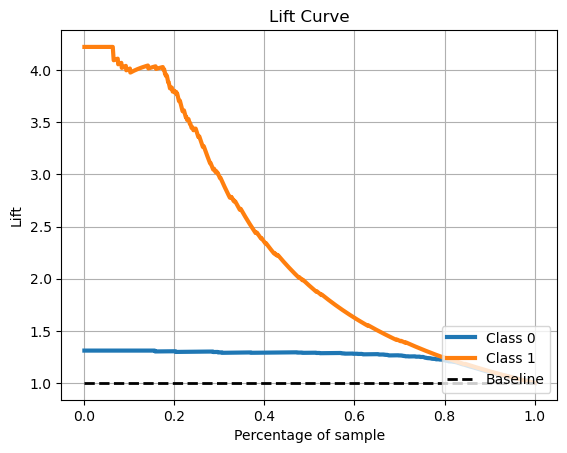

In [175]:
predicted_probas = rf_best.predict_proba(X_test)
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, predicted_probas)
plt.show()

## Q2 - Find the best cost-sensitive classification model

In [109]:
from sklearn.metrics import make_scorer
def miss_classification(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    result = 10*fn+1*fp
    return result
score = make_scorer(miss_classification, greater_is_better=False)

#### Decision Tree

In [110]:
tuned_parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

dt = tree.DecisionTreeClassifier()


dt = GridSearchCV(dt,tuned_parameters,cv=inner_cv,scoring=score)

dt.fit(X_train,y_train)

dt_best_params = dt.best_params_
dt_best_scores = dt.best_score_
dt_best_params, dt_best_scores

({'criterion': 'entropy', 'max_depth': 40}, -257.75)

[Text(0.809765625, 0.9807692307692307, 'X[21] <= -0.017\nentropy = 0.785\nsamples = 2030\nvalue = [1555, 475]'),
 Text(0.6783547794117647, 0.9423076923076923, 'X[2] <= -0.095\nentropy = 0.587\nsamples = 1738\nvalue = [1493, 245]'),
 Text(0.5637683823529411, 0.9038461538461539, 'X[5] <= 0.644\nentropy = 0.442\nsamples = 1627\nvalue = [1478, 149]'),
 Text(0.44753676470588233, 0.8653846153846154, 'X[15] <= -0.261\nentropy = 0.368\nsamples = 1546\nvalue = [1437, 109]'),
 Text(0.438125, 0.8269230769230769, 'X[13] <= -0.318\nentropy = 0.453\nsamples = 1146\nvalue = [1037, 109]'),
 Text(0.32801470588235293, 0.7884615384615384, 'X[23] <= -0.322\nentropy = 0.554\nsamples = 832\nvalue = [725, 107]'),
 Text(0.18705882352941178, 0.75, 'X[6] <= -0.036\nentropy = 0.319\nsamples = 536\nvalue = [505, 31]'),
 Text(0.15058823529411763, 0.7115384615384616, 'X[8] <= -0.325\nentropy = 0.252\nsamples = 522\nvalue = [500, 22]'),
 Text(0.10588235294117647, 0.6730769230769231, 'X[9] <= 23.944\nentropy = 0.083\

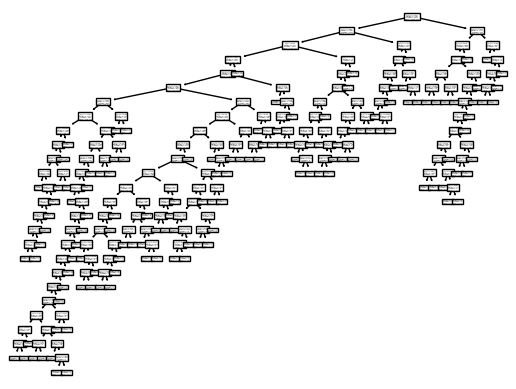

In [111]:
dt_best = tree.DecisionTreeClassifier(**dt_best_params)
dt_best = dt_best.fit(X_train, y_train)
tree.plot_tree(dt_best)

In [130]:
accuracy = cross_val_score(dt_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(dt_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(dt_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(dt_best,X_train,y_train,cv=10,scoring='f1')
missclassification_cost = cross_val_score(dt_best,X_train,y_train,cv=10,scoring=score)


print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(missclassification_cost)

[0.91133005 0.93103448 0.90640394 0.8817734  0.91625616 0.88669951
 0.85221675 0.87192118 0.91625616 0.91625616]
[0.84090909 0.85106383 0.76086957 0.77083333 0.85416667 0.71186441
 0.73333333 0.75510204 0.80851064 0.86363636]
[0.78723404 0.85106383 0.80851064 0.72340426 0.82978723 0.85416667
 0.6875     0.8125     0.79166667 0.83333333]
[0.82608696 0.86315789 0.78723404 0.73469388 0.84210526 0.78095238
 0.68817204 0.77669903 0.80412371 0.84782609]
[-108  -76 -109 -126  -77  -98 -143  -87 -110  -95]


In [131]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("missclassification_cost: %0.2f (+/- %0.2f)" % (missclassification_cost.mean(), missclassification_cost.std() * 2))

Accuracy: 0.90 (+/- 0.05)
Precision: 0.80 (+/- 0.11)
Recall: 0.80 (+/- 0.10)
F1_score: 0.80 (+/- 0.10)
missclassification_cost: -102.90 (+/- 39.94)


#### Logistic Regression

In [118]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

tuned_parameters = dict(solver=solvers,penalty=penalty,C=c_values)

lr = linear_model.LogisticRegression()
lr = GridSearchCV(lr,tuned_parameters,cv=inner_cv,scoring=score)

lr.fit(X_train,y_train)

lr_best_params = lr.best_params_
lr_best_scores = lr.best_score_
lr_best_params, lr_best_scores

({'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}, -281.0)

In [119]:
lr_best = linear_model.LogisticRegression(**lr_best_params)
lr_best = lr_best.fit(X_train, y_train)

In [124]:
accuracy = cross_val_score(lr_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(lr_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(lr_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(lr_best,X_train,y_train,cv=10,scoring='f1')
missclassification_cost = cross_val_score(lr_best,X_train,y_train,cv=10,scoring=score)


print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(missclassification_cost)

[0.94581281 0.91625616 0.89162562 0.89162562 0.9408867  0.89655172
 0.92118227 0.91133005 0.90640394 0.90640394]
[0.95       0.82608696 0.74509804 0.85714286 0.92682927 0.78723404
 0.88095238 0.85714286 0.82222222 0.79591837]
[0.80851064 0.80851064 0.80851064 0.63829787 0.80851064 0.77083333
 0.77083333 0.75       0.77083333 0.8125    ]
[0.87356322 0.8172043  0.7755102  0.73170732 0.86363636 0.77894737
 0.82222222 0.8        0.79569892 0.80412371]
[ -92  -98 -103 -175  -93 -120 -115 -126 -118 -100]


In [125]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("missclassification_cost: %0.2f (+/- %0.2f)" % (missclassification_cost.mean(), missclassification_cost.std() * 2))

Accuracy: 0.91 (+/- 0.04)
Precision: 0.84 (+/- 0.12)
Recall: 0.77 (+/- 0.10)
F1_score: 0.81 (+/- 0.08)
missclassification_cost: -114.00 (+/- 46.54)


#### KNN

In [133]:
tuned_parameters =  {'weights':['uniform','distance'],'n_neighbors':list(range(5,50)),'leaf_size': [1,20,30,40],
'p' : [1,2],'metric' : ['minkowski', 'chebyshev']}

knn = neighbors.KNeighborsClassifier()
knn = GridSearchCV(knn,tuned_parameters,cv=inner_cv,scoring=score)

knn.fit(X_train,y_train)

knn_best_params = knn.best_params_
knn_best_scores = knn.best_score_
knn_best_params, knn_best_scores

({'leaf_size': 1,
  'metric': 'chebyshev',
  'n_neighbors': 8,
  'p': 1,
  'weights': 'distance'},
 -323.5)

In [134]:
knn_best = neighbors.KNeighborsClassifier(**knn_best_params)
knn_best = knn_best.fit(X_train, y_train)

In [135]:
accuracy = cross_val_score(knn_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(knn_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(knn_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(knn_best,X_train,y_train,cv=10,scoring='f1')
missclassification_cost = cross_val_score(knn_best,X_train,y_train,cv=10,scoring=score)

print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(missclassification_cost)

[0.90640394 0.90147783 0.89655172 0.90640394 0.90147783 0.93103448
 0.88669951 0.90640394 0.91625616 0.91133005]
[0.85       0.81395349 0.77083333 0.85       0.82926829 0.9047619
 0.80487805 0.8372093  0.86046512 0.8       ]
[0.72340426 0.74468085 0.78723404 0.72340426 0.72340426 0.79166667
 0.6875     0.75       0.77083333 0.83333333]
[0.7816092  0.77777778 0.77894737 0.7816092  0.77272727 0.84444444
 0.74157303 0.79120879 0.81318681 0.81632653]
[-136 -128 -111 -136 -137 -104 -158 -127 -116  -90]


In [136]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("missclassification_cost: %0.2f (+/- %0.2f)" % (missclassification_cost.mean(), missclassification_cost.std() * 2))

Accuracy: 0.91 (+/- 0.02)
Precision: 0.83 (+/- 0.07)
Recall: 0.75 (+/- 0.08)
F1_score: 0.79 (+/- 0.05)
missclassification_cost: -124.30 (+/- 37.02)


#### SVM

In [140]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

svc = SVC()

svc = GridSearchCV(svc,tuned_parameters,cv=inner_cv,scoring=score)

svc.fit(X_train,y_train)

svc_best_params = svc.best_params_
svc_best_scores = svc.best_score_
svc_best_params, svc_best_scores

({'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}, -268.75)

In [141]:
svc_best = SVC(**svc_best_params,probability=True)
svc_best = svc_best.fit(X_train, y_train)

In [142]:
accuracy = cross_val_score(svc_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(svc_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(svc_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(svc_best,X_train,y_train,cv=10,scoring='f1')
missclassification_cost = cross_val_score(svc_best,X_train,y_train,cv=10,scoring=score)



print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(missclassification_cost)

[0.9408867  0.94581281 0.94581281 0.92610837 0.93103448 0.93596059
 0.93103448 0.93103448 0.90640394 0.92610837]
[0.92682927 0.90909091 0.92857143 0.94444444 0.90243902 0.84313725
 0.925      0.86956522 0.89189189 0.86666667]
[0.80851064 0.85106383 0.82978723 0.72340426 0.78723404 0.89583333
 0.77083333 0.83333333 0.6875     0.8125    ]
[0.86363636 0.87912088 0.87640449 0.81927711 0.84090909 0.86868687
 0.84090909 0.85106383 0.77647059 0.83870968]
[ -93  -74  -83 -132 -104  -58 -113  -86 -154  -96]


In [143]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("missclassification_cost: %0.2f (+/- %0.2f)" % (missclassification_cost.mean(), missclassification_cost.std() * 2))

Accuracy: 0.93 (+/- 0.02)
Precision: 0.90 (+/- 0.06)
Recall: 0.80 (+/- 0.12)
F1_score: 0.85 (+/- 0.06)
missclassification_cost: -99.30 (+/- 53.33)


#### Gradient Boosting

In [144]:
tuned_parameters = [{'n_estimators':[50,100],'max_depth':[3,5,7],
                    'min_samples_split':[3,5,7],'min_samples_leaf':[3,5,7],
                     'max_features':['sqrt','log2'],'learning_rate':[0.1,0.5,0.05,0.01,0.005],'subsample':[0.5,0.7]}]

gb = GradientBoostingClassifier()

gb = GridSearchCV(gb,tuned_parameters,cv=inner_cv,scoring=score)

gb.fit(X_train,y_train)

gb_best_params = gb.best_params_
gb_best_scores = gb.best_score_
gb_best_params, gb_best_scores

({'learning_rate': 0.5,
  'max_depth': 7,
  'max_features': 'sqrt',
  'min_samples_leaf': 7,
  'min_samples_split': 3,
  'n_estimators': 50,
  'subsample': 0.7},
 -195.0)

In [145]:
gb_best = GradientBoostingClassifier(**gb_best_params)
gb_best = gb_best.fit(X_train, y_train)

In [146]:
accuracy = cross_val_score(gb_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(gb_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(gb_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(gb_best,X_train,y_train,cv=10,scoring='f1')
missclassification_cost = cross_val_score(gb_best,X_train,y_train,cv=10,scoring=score)

print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(missclassification_cost)

[0.9408867  0.92610837 0.93596059 0.91133005 0.95073892 0.93103448
 0.92610837 0.92610837 0.93103448 0.92610837]
[0.89361702 0.88372093 0.91666667 0.9047619  0.86666667 0.81632653
 0.87804878 0.84444444 0.9047619  0.85106383]
[0.89361702 0.89361702 0.82978723 0.78723404 0.76595745 0.89583333
 0.8125     0.77083333 0.8125     0.85416667]
[0.875      0.86363636 0.875      0.89130435 0.84444444 0.87755102
 0.8125     0.86315789 0.85393258 0.88659794]
[ -74  -73  -96  -97 -103  -57 -115  -79  -97  -55]


In [147]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("missclassification_cost: %0.2f (+/- %0.2f)" % (missclassification_cost.mean(), missclassification_cost.std() * 2))

Accuracy: 0.93 (+/- 0.02)
Precision: 0.88 (+/- 0.06)
Recall: 0.83 (+/- 0.10)
F1_score: 0.86 (+/- 0.04)
missclassification_cost: -84.60 (+/- 38.03)


#### Random Forest

In [148]:
tuned_parameters = [{'n_estimators':[100,200,300],'max_depth':[2,3,4],
                    'min_samples_split':[2,3,5],'min_samples_leaf':[2,3,5],'max_features':['sqrt','log2']}]

rf = RandomForestClassifier(n_jobs=-1)
clf_rf = GridSearchCV(rf,tuned_parameters,cv=inner_cv,scoring=score)

clf_rf.fit(X_train,y_train)

rf_best_params = clf_rf.best_params_
rf_best_scores = clf_rf.best_score_
rf_best_params, rf_best_scores

({'max_depth': 4,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 200},
 -384.75)

In [149]:
rf_best = RandomForestClassifier(**rf_best_params)
rf_best = rf_best.fit(X_train, y_train)

In [150]:
accuracy = cross_val_score(rf_best,X_train,y_train,cv=10,scoring='accuracy')
precision = cross_val_score(rf_best,X_train,y_train,cv=10,scoring='precision')
recall = cross_val_score(rf_best,X_train,y_train,cv=10,scoring='recall')
f1_score = cross_val_score(rf_best,X_train,y_train,cv=10,scoring='f1')
missclassification_cost = cross_val_score(gb_best,X_train,y_train,cv=10,scoring=score)

print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(missclassification_cost)

[0.93596059 0.92118227 0.93103448 0.88669951 0.89655172 0.92118227
 0.91133005 0.92610837 0.88669951 0.90640394]
[0.97142857 0.94285714 0.97297297 0.96153846 0.88235294 0.94444444
 0.88888889 0.97222222 0.88235294 0.91428571]
[0.68085106 0.68085106 0.76595745 0.5106383  0.63829787 0.70833333
 0.66666667 0.70833333 0.625      0.6875    ]
[0.84337349 0.81927711 0.84337349 0.62857143 0.74074074 0.8
 0.77647059 0.84337349 0.72289157 0.8       ]
[-66 -86 -76 -85 -86 -59 -97 -77 -85 -97]


In [151]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("F1_score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("missclassification_cost: %0.2f (+/- %0.2f)" % (missclassification_cost.mean(), missclassification_cost.std() * 2))

Accuracy: 0.91 (+/- 0.03)
Precision: 0.93 (+/- 0.07)
Recall: 0.67 (+/- 0.13)
F1_score: 0.78 (+/- 0.13)
missclassification_cost: -81.40 (+/- 23.17)


#### Model Selection

In [152]:
dt_score = cross_val_score(dt_best,X=X_train,y=y_train,cv=outer_cv,scoring=score)
dt_score.mean()

-277.5

In [153]:
knn_score = cross_val_score(knn_best,X=X_train,y=y_train,cv=outer_cv,scoring=score)
knn_score.mean()

-323.5

In [154]:
lr_score = cross_val_score(lr_best,X=X_train,y=y_train,cv=outer_cv,scoring=score)
lr_score.mean()

-281.0

In [155]:
svc_score = cross_val_score(svc_best,X=X_train,y=y_train,cv=outer_cv,scoring=score)
svc_score.mean()

-268.75

In [156]:
gb_score = cross_val_score(gb_best,X=X_train,y=y_train,cv=outer_cv,scoring=score)
gb_score.mean()

-224.75

In [157]:
rf_score = cross_val_score(rf_best,X=X_train,y=y_train,cv=outer_cv,scoring=score)
rf_score.mean()

-410.5

###### According to the result, the gradient boosting model is the best model.

In [158]:
y_pred = gb_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[741  23]
 [ 38 199]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       764
           1       0.90      0.84      0.87       237

    accuracy                           0.94      1001
   macro avg       0.92      0.90      0.91      1001
weighted avg       0.94      0.94      0.94      1001



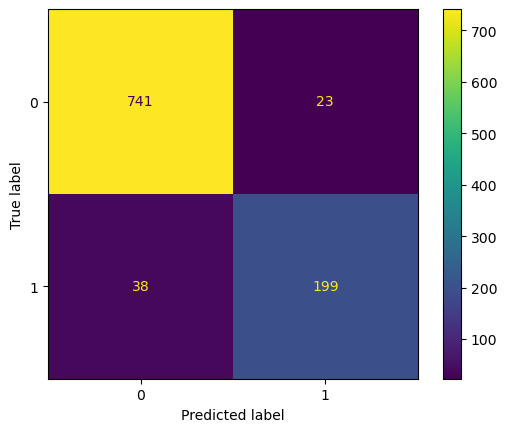

In [159]:
plot_confusion_matrix(gb_best,X_test,y_test)  
plt.show()

In [166]:
miss_classification(y_test,y_pred)

403

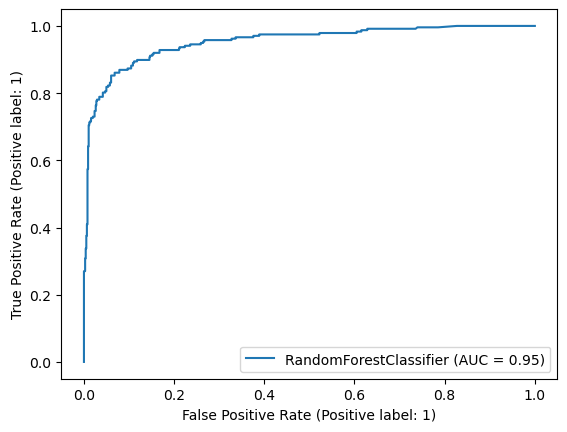

In [160]:
RocCurveDisplay.from_estimator(rf_best, X_test, y_test)
plt.show()

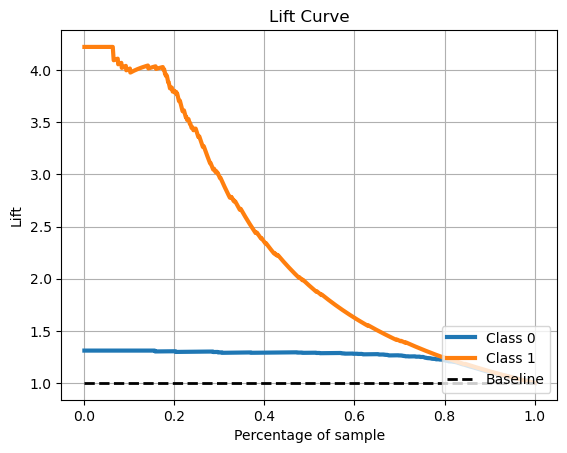

In [161]:
predicted_probas = rf_best.predict_proba(X_test)
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, predicted_probas)
plt.show()